<h1> New York City Airbnb Data Exploration </h1>

<center><img src = "airbnb.jpg"></center>

<h3>Introduction</h3>
    
<b>Airbnb</b> was started in 2008 by Brian Chesky and Joe Gebbia, two industrial designers that recently moved to San Francisco. Unable to afford the rent for their loft at the time, the pair decided to make up the money they needed by renting out their apartment to people who couldn’t find hotels to stay at while attending nearby trade shows. They set up air mattresses in the apartment’s living room for their guests to sleep on and cooked homemade breakfast in the morning.

Airbnb, as in “<i>Air Bed and Breakfast</i>,” is a service that lets property owners rent out their spaces to travelers looking for a place to stay. Travelers can rent a space for multiple people to share, a shared space with private rooms, or the entire property for themselves.

<h3> Goal of the project and data source </h3>

Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

This dataset describe around 49 000 rows with reservations made in New York City in 2019 year by Airbnb website with 16 columns. It is a mix of categorical and numerical values for example host name or reviews per month.

My goal was to convert untidy data into appropriate one, manipulate data and carry out data analisis and visualization with answering a few key questions including:
<ul>
    <li>What are the Top 10 most hosts in terms of number of reservations?</li>
    <li>What are the Top 20 most available neighbourhoods in New York City?</li>
    <li>Is log-price's distribution similar to normal?</li>
    <li>What is the average price, per night, for every room type of an Airbnb listing in NYC?</li>
    <li>How does the average price of an Airbnb listing, per month, compare to the private rental market? </li>
    <li>What does price ranges look like for every New York City borough? </li>
    <li>Which words are the most popular in Airbnb accomodation's names?</li>
</ul>

<h3>Importing Libraries</h3>

In [1]:
# Data cleaning and data managment
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

# Statistic part
from scipy.stats import norm
from scipy import stats

# Natural Language Processing
from wordcloud import WordCloud

# Image management
from PIL import Image

# Warnings
import warnings
warnings.filterwarnings('ignore')

<h3>Loading data</h3>

In [2]:
nyc_airbnb = pd.read_csv('AB_NYC_2019.csv')
nyc_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<h3>Database basic intformation</h3>

In [3]:
# Cheiking the amount of rows and columns
nyc_airbnb.shape

(48895, 16)

In [4]:
# Cheking the names of the columns
nyc_airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
# Cheking type and size of single column in dataset
nyc_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Loading data allows us to assess what we are dealing with, what data our collection contains. The 16 columns contain a fair amount of information that we will use to conduct a comprehensive analysis of the Airbnb market in New York. We can see that our collection is incomplete – there are significant differences for some columns in terms of missing values, and there are present both numeric and categorical data.

<h3>Understanding and cleaning data</h3>

From my point of view, the '<i>id</i>' and '<i>name</i>' columns are completely unnecessary, as each booking and booker (traveller) has its own unique number, so these data tell us nothing. Therefore, they should be removed ('<i>name</i>' is not deleted, because of the fact it is important for NLP). I act similarly with the '<i>last_review</i>' column, which is the date – because if a host has no reviews, this data does not exist. This allows me to confidently populate the 'reviews_per_month' column by inserting a value of 0 in place of NaN. I also get rid of duplicates at the outset (it's possible they're not there, but a simple line of code removes any doubt).

In [6]:
# Dropping duplicates if any exists
nyc_airbnb.drop_duplicates(keep = 'first', inplace = True)

# Dropping unnecessary columns
nyc_airbnb.drop(['id', 'last_review'], axis = 1, inplace = True)

nyc_airbnb.shape

(48895, 14)

In [7]:
# Checking potencial null values in all columns
nyc_airbnb.isna().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
# Filling NaN with 0 in column 'reviews_per_month'
nyc_airbnb.fillna({'reviews_per_month' : 0}, inplace = True)

# Checking if NaN still exists
nyc_airbnb.reviews_per_month.isna().sum()

0

In [9]:
# Short description of each numerical column in dataset
nyc_airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<h3>Data exploration</h3>

In [10]:
# Print all columns from the table
nyc_airbnb.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [11]:
# Sample row based on index label
nyc_airbnb.loc[0]

name                              Clean & quiet apt home by the park
host_id                                                         2787
host_name                                                       John
neighbourhood_group                                         Brooklyn
neighbourhood                                             Kensington
latitude                                                    40.64749
longitude                                                  -73.97237
room_type                                               Private room
price                                                            149
minimum_nights                                                     1
number_of_reviews                                                  9
reviews_per_month                                               0.21
calculated_host_listings_count                                     6
availability_365                                                 365
Name: 0, dtype: object

In [12]:
# Print unique values of neighbourhood_group and room_type
print(nyc_airbnb.neighbourhood_group.unique())
print(nyc_airbnb.room_type.unique())

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
['Private room' 'Entire home/apt' 'Shared room']


In [13]:
# Print unique values of neighbourhoods in each neighbourhood group
for i in nyc_airbnb.neighbourhood_group.unique():
    print('Neighbourhoods of {0}: {1}'.format(i, nyc_airbnb[nyc_airbnb['neighbourhood_group'] == i].neighbourhood.unique()))
    print('')

Neighbourhoods of Brooklyn: ['Kensington' 'Clinton Hill' 'Bedford-Stuyvesant' 'South Slope'
 'Williamsburg' 'Fort Greene' 'Crown Heights' 'Park Slope'
 'Windsor Terrace' 'Greenpoint' 'Bushwick' 'Flatbush'
 'Prospect-Lefferts Gardens' 'Prospect Heights' 'Brooklyn Heights'
 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill' 'Boerum Hill'
 'DUMBO' 'East Flatbush' 'Gravesend' 'East New York' 'Sheepshead Bay'
 'Fort Hamilton' 'Bensonhurst' 'Sunset Park' 'Brighton Beach'
 'Cypress Hills' 'Bay Ridge' 'Columbia St' 'Vinegar Hill' 'Canarsie'
 'Borough Park' 'Downtown Brooklyn' 'Midwood' 'Red Hook' 'Dyker Heights'
 'Sea Gate' 'Navy Yard' 'Brownsville' 'Manhattan Beach' 'Bergen Beach'
 'Coney Island' 'Bath Beach' 'Mill Basin']

Neighbourhoods of Manhattan: ['Midtown' 'Harlem' 'East Harlem' 'Murray Hill' "Hell's Kitchen"
 'Upper West Side' 'Chinatown' 'West Village' 'Chelsea' 'Inwood'
 'East Village' 'Lower East Side' 'Kips Bay' 'SoHo' 'Upper East Side'
 'Washington Heights' 'Financial District

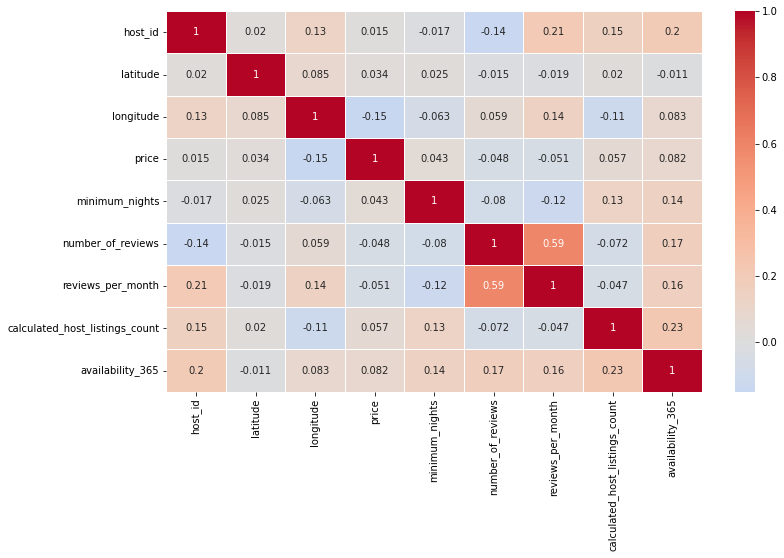

In [14]:
# Looking for correlations between features
correlation = nyc_airbnb.corr(method = 'pearson')

plt.figure(figsize = (12, 7))
sns.heatmap(correlation, cmap = 'coolwarm', center = 0.0, annot = True, linewidths = 0.5, cbar = True)
plt.show()

As can be seen from the correlation matrix, the data in the corresponding columns are not closely related except for the total number of reviews $(0.59)$ and the number of reviews per month. Every other pair is in the range $(-0.25, 0.25)$, indicating a very weak correlation. We can therefore assume that our data are uncorrelated.

In [15]:
nyc_airbnb.head(3)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


In [16]:
nyc_airbnb.tail(3)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.0,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.0,6,2
48894,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,0.0,1,23


<h3>Data analysis</h3>

Now it is time to conduct an analysis of the data we have in the table and answer questions related to Airbnb activity in New York. I will look at which hosts receive the most guests and illustrate the distribution of prices and the number of different types of flats in each neighbourhood of the city. I will also show the location of the flats on the map along with their availability throughout the year and the keywords in the names of the properties.

<h4><b>What are the Top 10 most hosts in terms of number of reservations?</b></h4>

In [17]:
# Joining name and host_id to create new unique host name (names might be doubled)
most_res = nyc_airbnb.host_id.value_counts().head(10)
nyc_airbnb['host_name_id'] = nyc_airbnb['host_name'].astype(str) + '_' + nyc_airbnb['host_id'].astype(str)
nyc_airbnb['host_name_id'].head(5)

0           John_2787
1       Jennifer_2845
2      Elisabeth_4632
3    LisaRoxanne_4869
4          Laura_7192
Name: host_name_id, dtype: object

In [18]:
# Counting the most frequent hosts in the database
most_res = nyc_airbnb.host_id.value_counts().head(10)
hosts = nyc_airbnb.host_name_id[most_res]
hosts

327    The Box House Hotel_417504
232                 Leslie_288031
121                   Vero_119588
103                     Ann_93790
96                     Dana_42032
96                     Dana_42032
91           Sean & Lynette_78460
87                   Edward_62407
65                     Mark_63924
52                    James_56104
Name: host_name_id, dtype: object

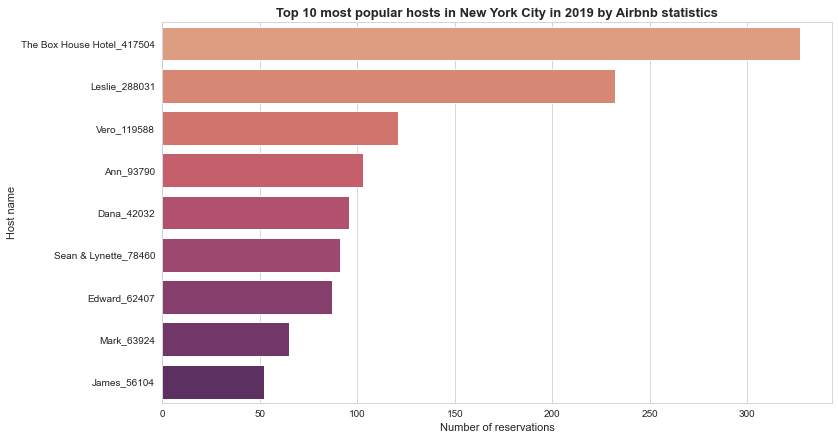

In [19]:
# Create new DataFrame with only the top 10 frequent hosts
top_hosts = pd.DataFrame(hosts)
top_hosts.reset_index(inplace = True)
top_hosts.rename(columns = {'index' : 'Number_of_reservations', 'host_name_id' : 'Host_name_id'}, inplace = True)

# Plot it on the bar plot
sns.set_style('whitegrid')
plt.figure(figsize = (12, 7))
sns.barplot(data = top_hosts, x = 'Number_of_reservations', y = 'Host_name_id', palette = 'flare')

plt.xlabel('Number of reservations', fontsize = 11)
plt.ylabel('Host name', fontsize = 11)
plt.title(r'Top 10 most popular hosts in New York City in 2019 by Airbnb statistics', fontsize = 13, weight = 'bold')

plt.show()

That is perfectly visible that The Box House Hotel (#Id 417504) and Lesile (#Id 288031) leaves far behind others hosts, having above 200 bookings in a year (The Box House Hotel has above 300!). From third place onwards, the differences between the lower places are much smaller than between 1st, 2nd and 3rd, but in New York we have two Airbnb dominators.

<h3><b> What are the Top 20 most available neighbourhoods in New York City?</b></h3>

In [20]:
# Counting the neighbourhood with the most available rooms/houses per day
n_available = nyc_airbnb.groupby('neighbourhood').sum('availability_365')
n_available['availability_per_day'] = n_available['availability_365'] / 365
most_available = n_available['availability_per_day'].round(0).nlargest(20)
most_available

neighbourhood
Bedford-Stuyvesant    1187.0
Williamsburg           803.0
Harlem                 776.0
Hell's Kitchen         745.0
Midtown                668.0
Bushwick               645.0
Upper East Side        556.0
Upper West Side        522.0
Crown Heights          411.0
Financial District     390.0
East Village           379.0
Chelsea                348.0
East Harlem            303.0
Astoria                269.0
East Flatbush          248.0
Washington Heights     244.0
Lower East Side        243.0
Greenpoint             242.0
Murray Hill            230.0
Flushing               194.0
Name: availability_per_day, dtype: float64

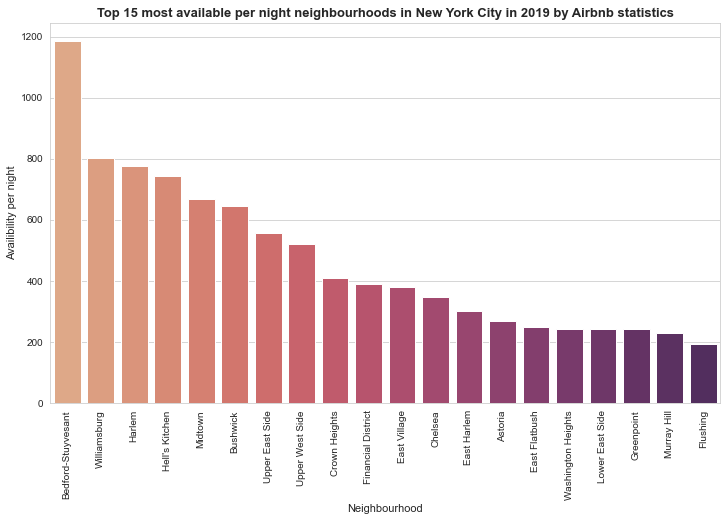

In [21]:
# Create new DataFrame with only the Top 20 most available per night neighbourhoods
top_availability = pd.DataFrame(most_available)
top_availability.reset_index(inplace = True)

# Plot it on the bar plot
sns.set_style('whitegrid')
plt.figure(figsize = (12, 7))
sns.barplot(y = 'availability_per_day', x = 'neighbourhood', data = top_availability, palette = 'flare')

plt.xlabel('Neighbourhood', fontsize = 11)
plt.xticks(rotation = 90)
plt.ylabel('Availibility per night', fontsize = 11)
plt.title(r'Top 15 most available per night neighbourhoods in New York City in 2019 by Airbnb statistics', fontsize = 13, weight = 'bold')

plt.show()

Bedford-Stuyvesant is emerging as the clear leader when it comes to housing availability throughout the year. In fact, it can be assumed that every day a potential landlord has a huge choice of accommodation, exceeding nearly 1,100. However, it must be taken into account that we do not have access to data on the specific dates when the accommodation is available, so perhaps the field of choice is sometimes not so wide.

<h4><b>Is log-price's distribution similar to normal?</b></h4>

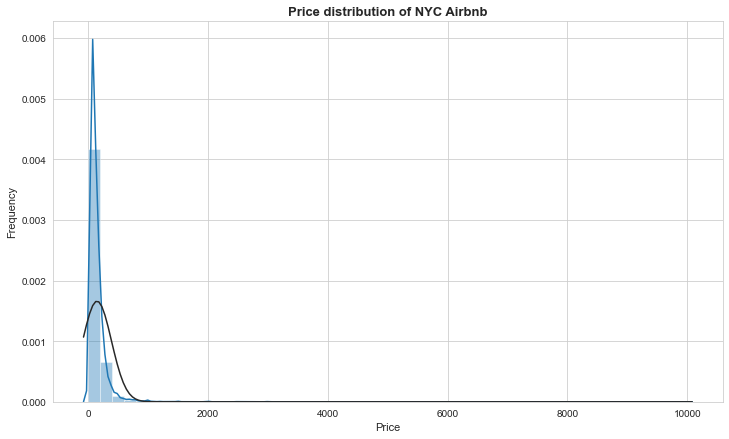

In [22]:
# Subseting prices for listings costing $0
free_listings = nyc_airbnb['price'] == 0

# Updating prices by removing all free listings from prices
nyc_airbnb = nyc_airbnb.loc[~free_listings]

# Creating histogram of the prices in Airbnb in New York
plt.figure(figsize = (12, 7))

sns.distplot(x = nyc_airbnb['price'], fit = norm)
plt.xlabel('Price', fontsize = 11)
plt.ylabel('Frequency', fontsize = 11)
plt.title('Price distribution of NYC Airbnb', fontsize = 13, weight = 'bold')
plt.show()

Our original continuous data is left-skewed and do not follow the bell (normal) curve, we can log transform this data to make it as “<i>normal</i>” as possible so that the statistical analysis results from this data become more valid. I is significantly important when we could predict the price of the room/flat by machine laerning algorithms.

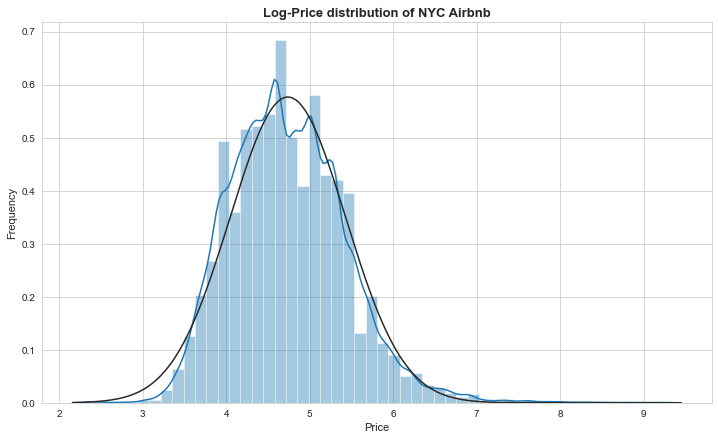

In [23]:
# Log-transformation for prices
nyc_airbnb['log_prices'] = np.log(nyc_airbnb['price'] + 1)

plt.figure(figsize = (12, 7))

sns.distplot(x = nyc_airbnb['log_prices'], fit = norm)
plt.xlabel('Price', fontsize = 11)
plt.ylabel('Frequency', fontsize = 11)
plt.title('Log-Price distribution of NYC Airbnb', fontsize = 13, weight = 'bold')
plt.show()

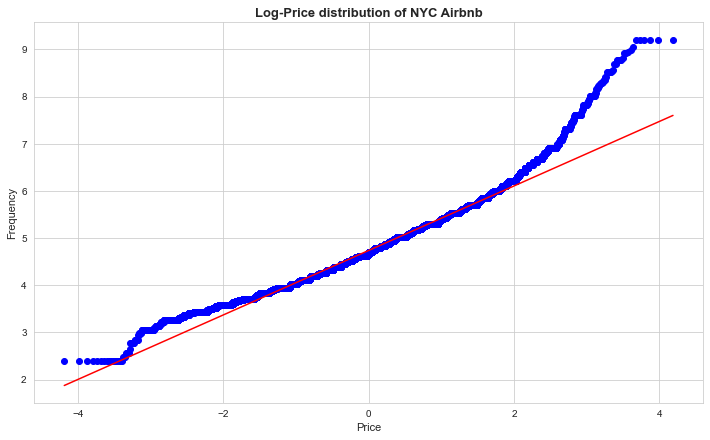

In [24]:
# Drawing also qqplot to comparison quantiles to normal distribution
plt.figure(figsize = (12, 7))
stats.probplot(nyc_airbnb['log_prices'], plot = plt)

plt.xlabel('Price', fontsize = 11)
plt.ylabel('Frequency', fontsize = 11)
plt.title('Log-Price distribution of NYC Airbnb', fontsize = 13, weight = 'bold')

plt.show()

In [25]:
mean = nyc_airbnb['log_prices'].mean()
std = nyc_airbnb['log_prices'].std()
normal_random = np.random.normal(loc = mean, scale = std, size = 10000)
stats.kstest(nyc_airbnb['log_prices'], normal_random)

KstestResult(statistic=0.06456028966533017, pvalue=1.5828539251445023e-30)

Transformation by using the natural logarithm on the price distribution allowed a significant approximation to the normal distribution and showed that most prices are very close to each other, even though there are large values of outliers. That would be significantly important if I want to make predictions on prices of bookings. However, Kolmogorov–Smirnov test clearly  shows that log prices aren't from normal distribution.

<h4><b>How many reservations are made for every room type and what is the average price per night for each of them?</b></h4>

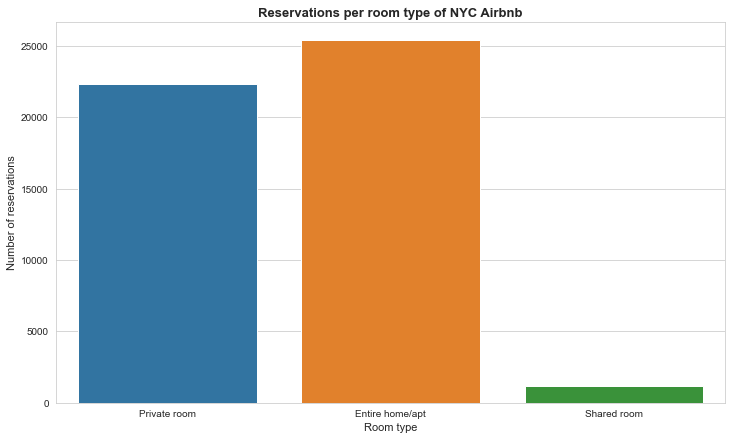

In [26]:
# Drawing countplot for number of reservations
plt.figure(figsize = (12, 7))

sns.countplot(x = 'room_type', data = nyc_airbnb)

plt.xlabel('Room type', fontsize = 11)
plt.ylabel('Number of reservations', fontsize = 11)
plt.title('Reservations per room type of NYC Airbnb', fontsize = 13, weight = 'bold')

plt.show()

There is a clear disproportion between the numbers of reservations of entire home and privy room and the share room. The first two exceed more than 20,000 bookings, with the third option accounting for only a fraction of these.

In [27]:
# Calculate the average price for every room type
nyc_airbnb.groupby('room_type')['price'].mean()

room_type
Entire home/apt    211.810918
Private room        89.809131
Shared room         70.248705
Name: price, dtype: float64

There is no surprise here. Renting an entire apartment/home is by far the most expensive - the average such rental per day is more than twice as expensive as a private room or shared room.

<h4><b>What is the number of minimum nights for every room type of an Airbnb listing in NYC?</b></h4>

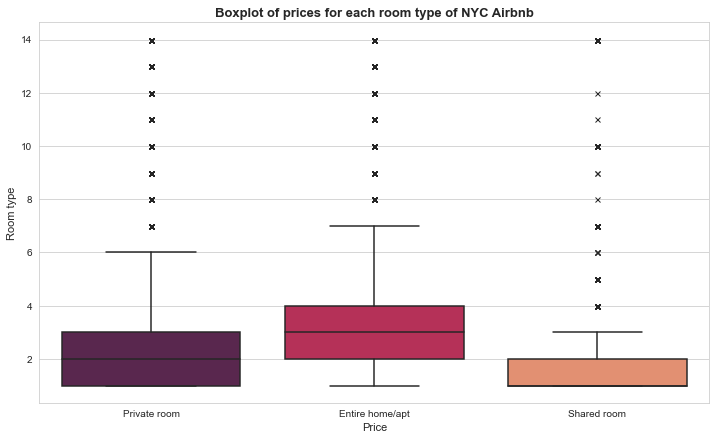

In [28]:
# Drawing boxplot of prices for each room type
nyc_air = nyc_airbnb[nyc_airbnb['minimum_nights'] < 15]

plt.figure(figsize = (12, 7))
sns.boxplot(data = nyc_air, y = 'minimum_nights', x = 'room_type', flierprops = {"marker": "x"}, palette = 'rocket')

plt.xlabel('Price', fontsize = 11)
plt.ylabel('Room type', fontsize = 11)
plt.title('Boxplot of prices for each room type of NYC Airbnb', fontsize = 13, weight = 'bold')

plt.show()

There are no clear differences by accommodation type for the minimum number of nights on site. We see that the entire home is rented for the longest time on average, but this is usually a matter of 1-2 days. However, this is quite logical - renting an entire home - on the part of the hosts it takes the most time to prepare the entire apartment/room, and there are probably also the highest demands of the renters. Therefore, the number of nights can be the highest, as this increases the potential profit.

<h4><b>What are the prices for every neighbourhood group?</b></h4>

In [29]:
# Percentage of bookings by neighbourhood 
neighbourhood_percent = nyc_airbnb['neighbourhood_group'].value_counts(normalize = True)
neighbourhood_percent

Manhattan        0.443090
Brooklyn         0.411075
Queens           0.115907
Bronx            0.022298
Staten Island    0.007630
Name: neighbourhood_group, dtype: float64

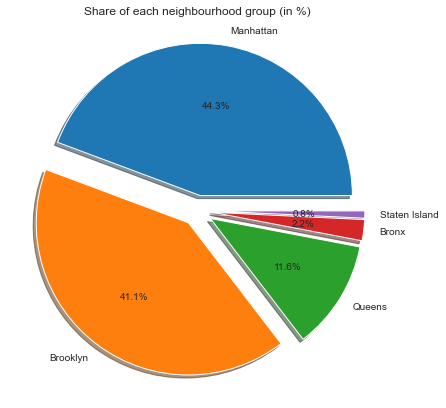

In [30]:
# Pie chart with share of each neighbourhood group
plt.figure(figsize = (12, 7))

plt.pie(neighbourhood_percent, explode=[0.1, 0.1, 0.1, 0.1, 0.1], labels = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'], 
        autopct = '%1.1f%%', shadow = True)
plt.title('Share of each neighbourhood group (in %)')

plt.show()

In [31]:
# Neighbourhood groups: 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island' basic statistics
nyc_airbnb.groupby('neighbourhood_group')['price'].describe(percentiles = [0.25, 0.5, 0.75, 0.95]).T

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
count,1090.000000,20095.000000,21660.000000,5666.000000,373.000000
mean,87.577064,124.438915,196.884903,99.517649,114.812332
std,106.725371,186.896837,291.386838,167.102155,277.620403
min,10.000000,10.000000,10.000000,10.000000,13.000000
25%,45.000000,60.000000,95.000000,50.000000,50.000000
50%,65.000000,90.000000,150.000000,75.000000,75.000000
75%,99.000000,150.000000,220.000000,110.000000,110.000000
95%,197.650000,285.000000,450.000000,225.000000,250.000000
max,2500.000000,10000.000000,10000.000000,10000.000000,5000.000000


Definitely the most accommodation is booked in Brooklyn and Manhattan. The difference between these two boroughs and Queens, third in this category, is around 30%. Staten Island, on the other hand, is not even 1% in this category.

As far as prices are concerned, the cheapest accommodation can be found in the Bronx, with the smallest fluctuations between prices, as illustrated by the lowest standard deviation, the only one oscillating at just over 100 USD. In contrast, by far the most expensive is Manhattan with an average price of almost 197 USD per night. The highest prices in the individual price distribution can also be seen - for example, at the 95th percentile, the price is 450 USD, with Brooklyn, second in this hierarchy, hovering around 285 USD. It is somewhat surprising that the most expensive neighbourhood attracts the highest number of tourists.

Due to the existence of outliers - it can be seen that there is a gigantic gap between the 95th percentile and the maximum values - I will limit the data to those with a price below 500 USD. This will make the price distribution charts for specific neighbourhoods much clearer. 

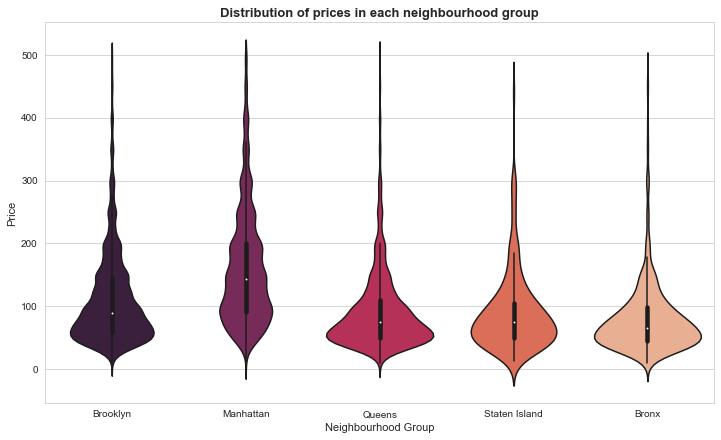

In [32]:
# Cut the prices above 500 dolars
price_restiction = nyc_airbnb[nyc_airbnb['price'] < 500]

# Plotting distribution of prices in each neighbourhood group using violinplot
plt.figure(figsize = (12, 7))
sns.violinplot(data = price_restiction, x = 'neighbourhood_group', y = 'price', scale = 'area', palette = 'rocket')

plt.xlabel('Neighbourhood Group', fontsize = 11)
plt.ylabel('Price', fontsize = 11)
plt.title(r'Distribution of prices in each neighbourhood group', fontsize = 13, weight = 'bold')

plt.show()

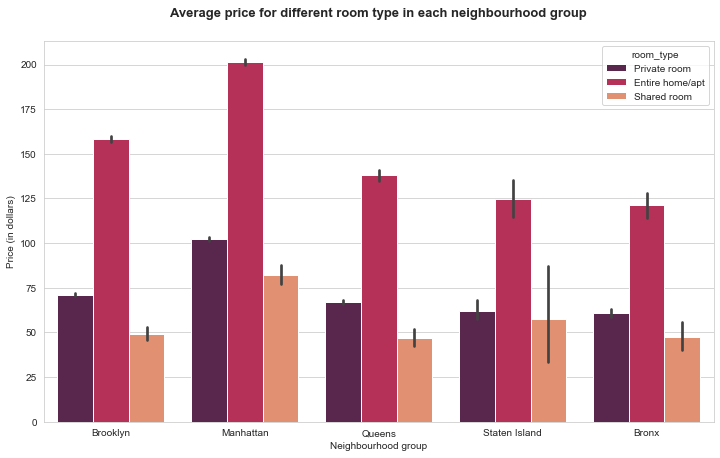

In [33]:
# Comaprison of average price of each of room type in all neighbourhood group
sns.set_style('whitegrid')
plt.figure(figsize = (12, 7))

sns.barplot(data = price_restiction, x = 'neighbourhood_group', y = 'price', hue = 'room_type', palette = 'rocket')

plt.xlabel('Neighbourhood group')
plt.ylabel('Price (in dollars)')
plt.title('Average price for different room type in each neighbourhood group', y = 1.05, fontsize = 13, weight = 'bold')

plt.show()

The bar chart gives us an idea of the distribution of prices by neighbourhood and type of accommodation. It can be seen that Manhattan is the most expensive regardless of the choice of accommodation type, having the average for each of them at a significantly higher level. In the other neighbourhoods, prices are similar for each other, except for the entire home in Brooklyn, as its price is visibly higher. Although it is worth noting that there is a very high standard deviation for a shared room in Staten Island.

<h4><b>What does price ranges look like for every New York City borough?</b></h4>

I would like also to categorize listings based on whether they fall into specific price ranges, and view this by borough. I can do this using percentiles and labels to create a new column, <b>price_range</b>, in the DataFrame. Once I have created the labels, I can then group the data and count frequencies for listings in each price range by borough.

<table>
<thead>
<tr>
<th>label</th>
<th>price</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>Budget</code></td>
<td>\$0-69</td>
</tr>
<tr>
<td><code>Average</code></td>
<td>\$70-175</td>
</tr>
<tr>
<td><code>Expensive</code></td>
<td>\$176-350</td>
</tr>
<tr>
<td><code>Extravagant</code></td>
<td>&gt; \$350</td>
</tr>
</tbody>
</table>

In [34]:
# Create labels for the price range
label_names = ['Budget', 'Average', 'Expensive', 'Extravagant']

# Create the label ranges
ranges = [0, 69, 175, 350, 500]

# Insert new column, price_range, into DataFrame
nyc_airbnb['price_range'] = pd.cut(nyc_airbnb['price'], bins = ranges, labels = label_names)

# Calculate borough and price_range frequencies, prices_by_borough
prices_by_borough = nyc_airbnb.groupby(['neighbourhood_group', 'price_range'])["price_range"].count()
print(prices_by_borough)

neighbourhood_group  price_range
Bronx                Budget           573
                     Average          455
                     Expensive         44
                     Extravagant       11
Brooklyn             Budget          6563
                     Average        10274
                     Expensive       2713
                     Extravagant      316
Manhattan            Budget          2513
                     Average        10872
                     Expensive       6470
                     Extravagant     1032
Queens               Budget          2549
                     Average         2577
                     Expensive        460
                     Extravagant       51
Staten Island        Budget           162
                     Average          169
                     Expensive         34
                     Extravagant        2
Name: price_range, dtype: int64


You can see here how different the price range can be depending on the borough of New York. In the case of Staten Island, there is a great deal of accommodation in the budget and average price ranges, which outweighing the expensive and extravagant. The situation is similar in the Bronx, except that there are almost 100 more budget places than average. 

Manhattan has the highest number of average places, but also leaves a lot of expensive places and significantly more extravagant places than the other boroughs - which is to be expected, as this borough was the most expensive each time in terms of room type. In Brooklyn, average room nights have a similar number, but quite the opposite of budget and expensive places. In Quenns, there are a similar number of budget and avarage places, some expensive and a negligible proportion of extravagant places. 

<h4><b>Heatmap of visitors' frequency in New York City</b></h4>

Using two variables ('longitude' and 'latitude') and images of New York, I can depict each dwelling included in the data on the map. In addition, I distinguish each neighbourhood with its colour. I do the same with the types and eoom type, availability in a year and price ranges.

<b>Neighbourhood groups in New York City</b>

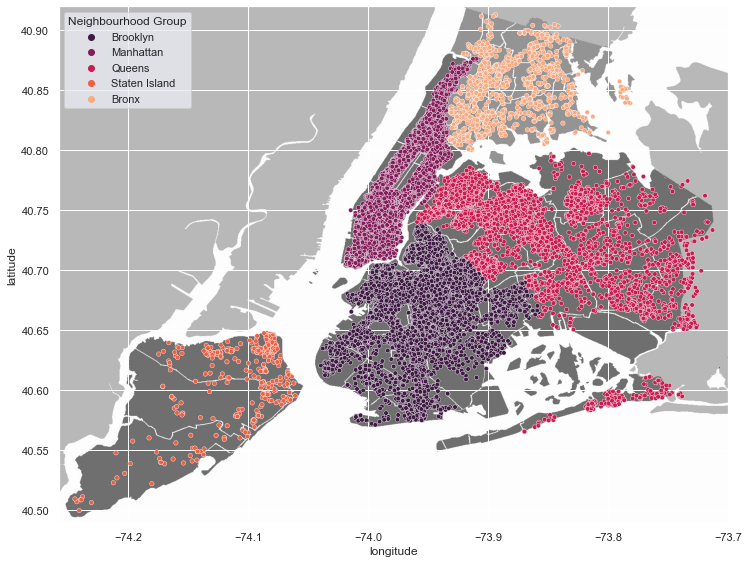

In [43]:
fig, ax = plt.subplots(figsize = (12,12))

# Showing background image of New York map
img = plt.imread('New_York_City_.png', 0)
coordenates_to_extent = [-74.258, -73.7, 40.49, 40.92]
ax.imshow(img, zorder = 0, extent = coordenates_to_extent)

# Plotting rooms' locations using longitude and latitude from data
scatter_map = sns.scatterplot(x = 'longitude', y = 'latitude', hue = 'neighbourhood_group', 
                              s = 20, ax = ax, data = nyc_airbnb, palette = 'rocket')
ax.grid(True)
plt.legend(title = 'Neighbourhood Group')

plt.show()

As shown earlier, by far the largest number of flats/houses/rooms are located in Brooklyn and Manhattan, ideally the largest fill in a particular section of the map. In contrast, we see very little in Staten Island, whose accommodation makes up a fraction of all bookings.

<b>Room types in New York City</b>

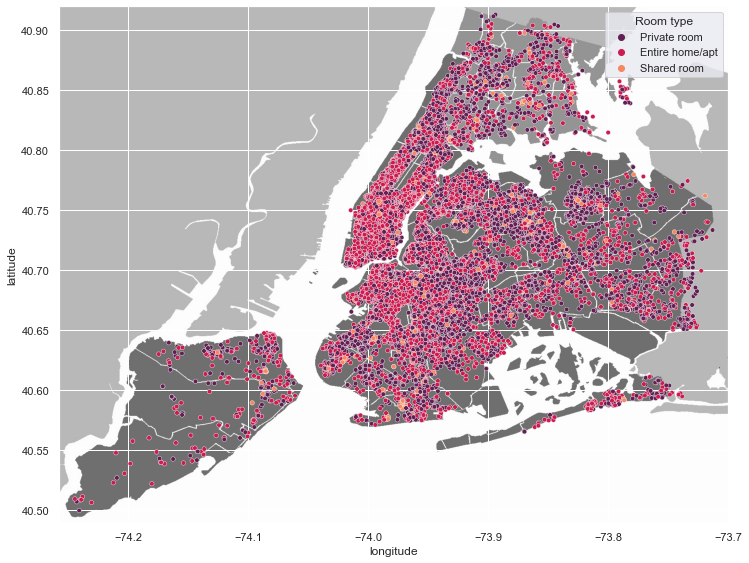

In [44]:
fig, ax = plt.subplots(figsize = (12,12))
sns.set(rc={'figure.figsize':(11.7,8.27)})

# The same things with room types
# Showing background image of New York map
ax.imshow(img, zorder = 0, extent = coordenates_to_extent)

# Plotting room types using longitude and latitude from data
#sns.reset_defaults()
scatter_map = sns.scatterplot(x = 'longitude', y = 'latitude', hue = 'room_type', 
                              s = 20, ax = ax, data = nyc_airbnb, palette= 'rocket')
ax.grid(True)
plt.legend(title = 'Room type')

plt.show()

As above, the breakdown quoted earlier regarding room type is excellent. Throughout the map, private room and entire home are passed between each other with single dots indicating shared room.

<b>Availability in 365 days of a room in New York City</b>

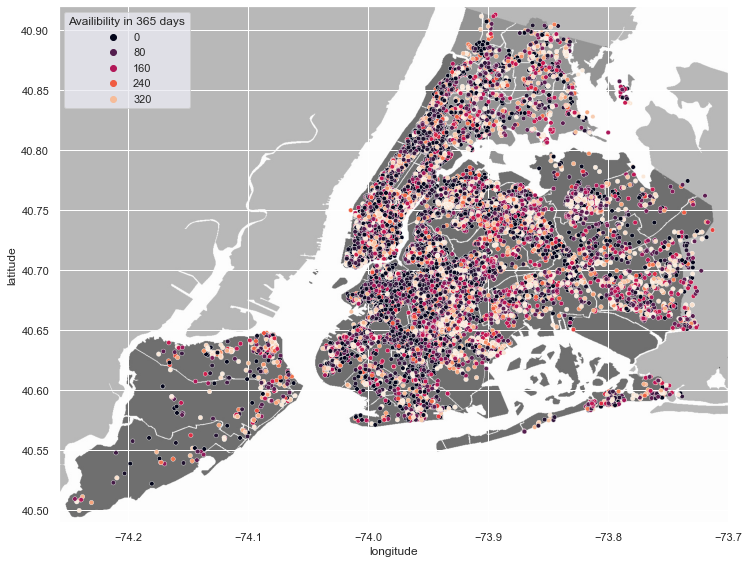

In [45]:
fig, ax = plt.subplots(figsize = (12,12))

# Showing background image of New York map
img = plt.imread('New_York_City_.png', 0)
coordenates_to_extent = [-74.258, -73.7, 40.49, 40.92]
ax.imshow(img, zorder = 0, extent = coordenates_to_extent)

# Plotting rooms' locations using longitude and latitude from data
scatter_map = sns.scatterplot(x = 'longitude', y = 'latitude', hue = 'availability_365', 
                              s = 20, ax = ax, data = nyc_airbnb, palette = 'rocket')
ax.grid(True)
plt.legend(title = 'Availibility in 365 days')

plt.show()

In this case, draw some specific correlations. There is a more or less similar distribution of seat availability in all districts. 

<b>Price ranges in New York City</b>

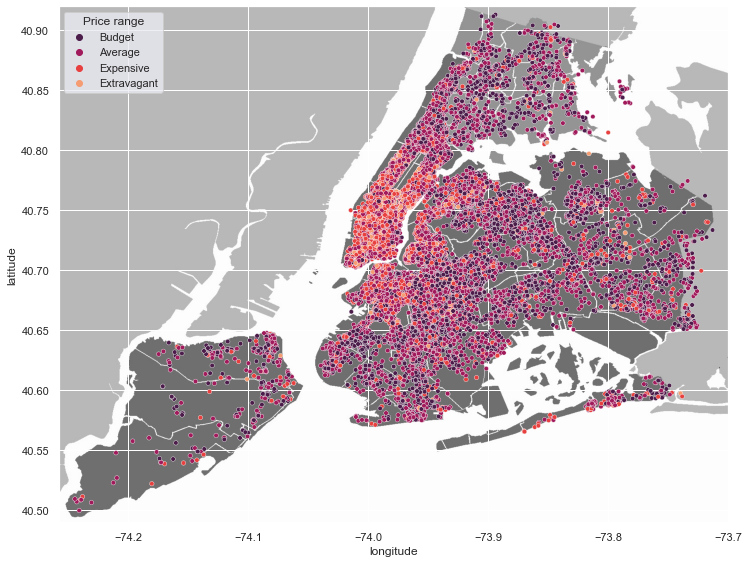

In [46]:
fig, ax = plt.subplots(figsize = (12,12))

# Showing background image of New York map
img = plt.imread('New_York_City_.png', 0)
coordenates_to_extent = [-74.258, -73.7, 40.49, 40.92]
ax.imshow(img, zorder = 0, extent = coordenates_to_extent)

# Plotting rooms' locations using longitude and latitude from data
scatter_map = sns.scatterplot(x = 'longitude', y = 'latitude', hue = 'price_range', 
                              s = 20, ax = ax, data = nyc_airbnb, palette = 'rocket')
ax.grid(True)
plt.legend(title = 'Price range')

plt.show()

It is perfectly evident here that in the case of Manhattan, we have the most extravagant places. In addition, the different types are intermingled in most places with budget advantage in Brooklyn and Queens.

<b><h4>Which words are the most popular in Airbnb accomodation's names?</b></h4>

Using the wordcloud package, I can generate a map with the most frequent key words in names of accomodation. I do the same for districts, which shows which districts are most frequently selected by users.

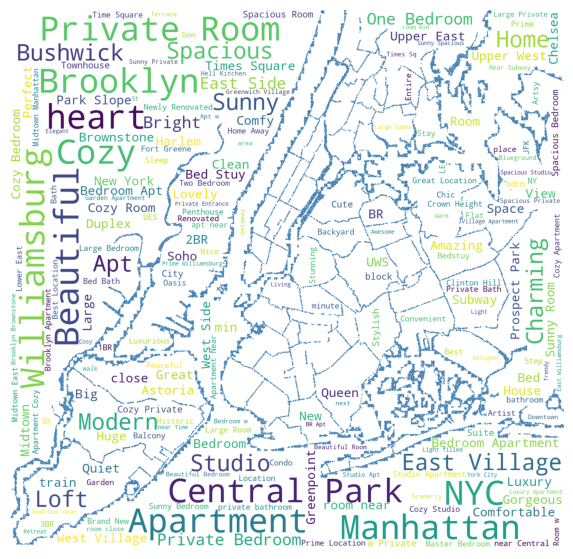

In [49]:
# Creating mask of Ney York City map
nyc_mask = np.array(Image.open('New_York_City_.png'))

plt.subplots(figsize=(12, 7))

# Creating WordCloud from NYC Airbnb names
# Seperate these names from data which are empty
# (relative_scaling = 0 means the frequencies in the data are reflected less)
wordcloud = WordCloud(background_color = 'white', width = 1920, height = 1080, mask = nyc_mask, random_state = 42,
                      contour_width = 1.5, contour_color = 'steelblue', max_font_size = 80, relative_scaling = 0
                     ).generate(" ".join(nyc_airbnb.name[nyc_airbnb.name != np.nan].astype('str')))

plt.imshow(wordcloud)
plt.axis('off')

plt.show()

Among the key keywords, there is a clear tendency for hosts to use words associated with a particular neighbourhood (e.g. Brooklyn, Manhattan, Central Park), with a particular type of accommodation (apartment, private room), as well as adjectives with positive connotations (beautiful, cosy, spacious). Linking at least two of these options to each other can contribute to the success of our accommodation, as well as increase the chance of a search by keyword in the Airbnb search engine.

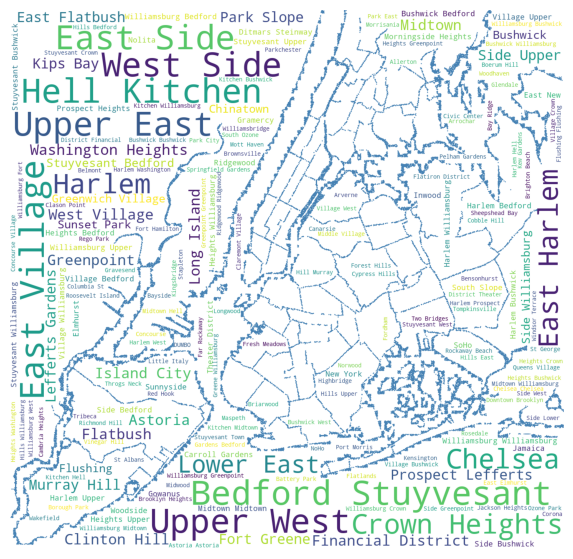

In [50]:
# Creating mask of Ney York City map
nyc_mask = np.array(Image.open('New_York_City_.png'))

plt.subplots(figsize=(12, 7))

wordcloud = WordCloud(background_color = 'white', width = 1920, height = 1080, mask = nyc_mask, random_state = 42,
                      contour_width = 1.5, contour_color = 'steelblue', max_font_size = 80, relative_scaling = 0
                     ).generate(" ".join(nyc_airbnb.neighbourhood))

plt.imshow(wordcloud)
plt.axis('off')

plt.show()

As we can see from the image above, the most reviled neighbourhoods in New York City by Airbnb users are East Side, West Side, Upper East, Upper West, Hell Kichen, Bedford, East Village, Crown Heights and Stuyvesant. 

<h3>Summary</h3>

NYC Airbnb ('AB_NYC_2019') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented. 

Firstly, I wanted to learn more about dataset, so I carried out data manipulations and data cleaning, thanks to them I understood data shape, columns, their types and solve little difficulties with some missings in dataset. Then I cheked unique values, especailly room types, neighbourhood groups etc. Then I looked deeply into possible correlations and make analyses with answering on a few questions. I showed which hosts have most reservations using the year, what is the average price, per night, for every room type or which key words are the most frequent in the names of bookings in website. Also I presented on maps room types, availibility per 365 days and price ranges in different borough of New York City.

Overall, I think I discovered a very good number of interesting relationships between features and explained each step of the process. This data analytics is very much mimicked on a higher level on Airbnb data team for taking better business decisions, conducting effective marketing actions and implementing new features.